<a href="https://colab.research.google.com/github/beatlesatani/sentiment_analysis/blob/main/sentiment_analysis_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_text
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3

In [2]:
 pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 37.5 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=1b5155deebc36171dc8dcbdeeef520ab6aff2a22e21056a9603f7d5440c811cd
  Stored

In [3]:
import os
import shutil
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from torch import nn, optim
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from collections import defaultdict




## Data Preprocessing

In [4]:
#setup the dataset
test = 'https://raw.githubusercontent.com/beatlesatani/coding_september/main/test.csv'
train = "https://raw.githubusercontent.com/beatlesatani/coding_september/main/train.csv"
test = pd.read_csv(test,encoding='unicode_escape')
train = pd.read_csv(train,encoding='unicode_escape')
# remove unusuful columns
test = test.iloc[:,1:3]
train = train.iloc[:, [1,3]]
#check the insull values of train dataframe
train.isnull().sum()
#only one text is missing, so drop that low that incluse null cell
train = train.dropna()
#re-check null values
train.isnull().sum()

text         0
sentiment    0
dtype: int64

In [5]:
#afeter checking original csv file, all raws after 3533 is null
test = test.dropna()
#re-check null values
test.isnull().sum()

text         0
sentiment    0
dtype: int64

In [6]:
#check the label imbalance
train['sentiment'].value_counts(normalize=True)
test['sentiment'].value_counts(normalize=True)

neutral     0.404641
positive    0.312111
negative    0.283248
Name: sentiment, dtype: float64

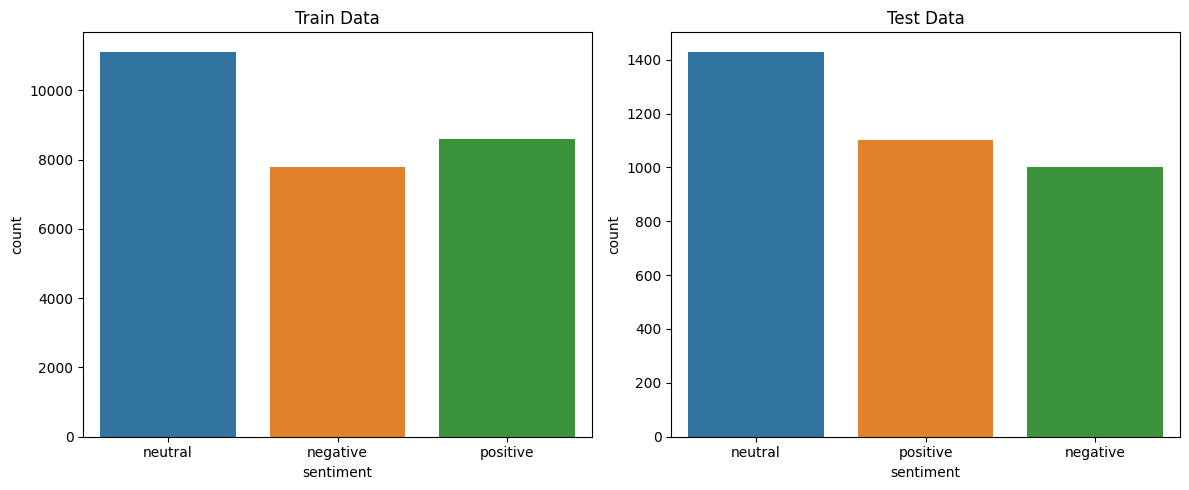

In [7]:
#graph
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='sentiment', data=train, ax=axes[0],saturation = 0.75)
axes[0].set_title('Train Data')

# Plot the countplot for 'sentiment' in the 'test' DataFrame
sns.countplot(x='sentiment', data=test, ax=axes[1])
axes[1].set_title('Test Data')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

### we can conclude the labels are not inbalanced.

### convert each sentiment into numerical value
##### negative = 0 , neutral = 1, positive = 2

In [8]:
# Convert labels to integers: negative -> 0, neutral -> 1, positive -> 2
train['label'] = train['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
test['label'] = test['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


In [9]:
#split the dataset
X_train = train['text']
y_train = train['label']
X_test = test['text']
y_test = test['label']

In [10]:
#check the dataset
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27480,), (27480,), (3534,), (3534,))

## Convert sentences into numerical value so that model can read them (Encoding)


In [11]:
from transformers import BertTokenizer,TFBertModel,BertConfig,TFBertForSequenceClassification,AdamW

##### text BertTokenizer → 1.tokenizing, 2.convert token strings into ids

In [12]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased",do_lower_case = True)

##### to see how tokenizer works, put a sentence into the tokenizer

In [13]:
sentence = train.iloc[0][0]
print('actual sentence:',sentence)
print("Tokeins : ",tokenizer.tokenize(sentence))
print("Token to ids:",tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence)))
#‘convert_tokens_to_ids’ method converts an array of tokens to corresponding ids using the Bert dictionary mentioned earlier.

actual sentence:  I`d have responded, if I were going
Tokeins :  ['i', '`', 'd', 'have', 'responded', ',', 'if', 'i', 'were', 'going']
Token to ids: [1045, 1036, 1040, 2031, 5838, 1010, 2065, 1045, 2020, 2183]


#####  this is the basic example of word encoding

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
<ipython-input-14-9c5678578d88>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


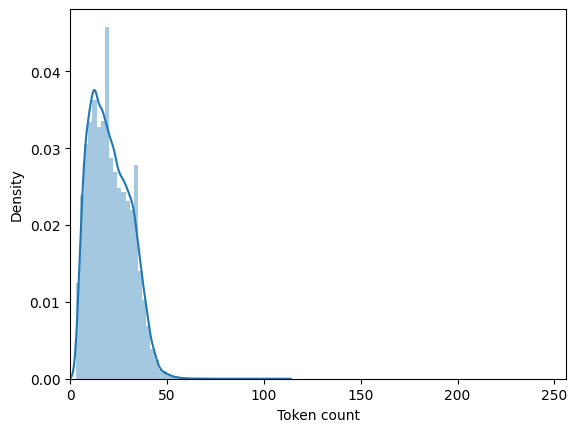

In [14]:
# to find the longest length, I gonna concat train,test
df = pd.concat([train,test])
token_lens = []

for txt in df["text"]:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

# I'll set max_len as 75
max_len = 75

#### most of the token is less than 60.
#### This may be due to twitter's character limit of 140 characters.



##### To do encoding of each sentence, use "encode_plus" method.
##### encode_plus will:

1.  Tokenize the sentence (separate senteces into the list of word)
2.  Prepend the ‘[CLS]’ token to the start.(CLS stands for the beginning of each sentence. described as 101 in token_id)
3. Append the ‘[SEP]’ token to the end.(SEP indicates the end of sentence.desctibed as 102 in token_id)
4. Map tokens to their IDs.
5. Pad or truncate the sentence to ‘max_length’(value 0 is assigned into the null [136,5342,1313,0,0])
6. Create attention masks for ‘[PAD]’ tokens.(this is binary tensor, 1:non_null ,0:null)

In [15]:
def mask_inputs_for_bert(tweets, max_len):
    # Tokenize all of the sentences and map the tokens to their word IDs.
    input_ids = []
    attention_masks = []

    # For every sentence...
    for tweet in tweets:
        # Encode the tweet using the tokenizer.
        encoded_dict = tokenizer.encode_plus(
            tweet,
            add_special_tokens=True, #add cls and sep
            max_length=max_len,   #pad & truncate all sentences
            pad_to_max_length=True,
            return_attention_mask=True  #construct attention_masks
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists to tensors (vectors) and return
    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)

    return input_ids, attention_masks

In [16]:
train_inp,train_mask = mask_inputs_for_bert(X_train,max_len)
val_inp,val_mask = mask_inputs_for_bert(X_test,max_len)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2622: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [17]:
train_label = tf.convert_to_tensor(y_train)
val_label = tf.convert_to_tensor(y_test)
#ここhone-hot-codingにした方がよい?
#train_label = tf.one_hot(train_label, depth=3)
#val_label = tf.one_hot(val_label, depth=3)


In [24]:
print(X_train.iloc[0])
print(train_inp[0])
print(train_mask[0])

 I`d have responded, if I were going
tf.Tensor(
[ 101 1045 1036 1040 2031 5838 1010 2065 1045 2020 2183  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0], shape=(75,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0], shape=(75,), dtype=int32)


In [25]:
val_label

<tf.Tensor: shape=(3534,), dtype=int64, numpy=array([1, 2, 0, ..., 0, 2, 2])>

## Here I retrieve pre_trained classificaion model from hugging_face


https://huggingface.co/docs/transformers/v4.33.2/en/model_doc/bert#transformers.TFBertForSequenceClassification

In [26]:
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels = 3)
#bert-base-uncased is 12-layer, 768-hidden, 12-heads, 110M parameters which is lightest BERT model
#I set num_labels as 3 because there are 3 categories in label

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Define the paths and directory
log_dir = '/content/drive/My Drive/sentiment_analysis'
model_save_path = '/content/drive/My Drive/Colab_Notebooks/bert_model.h5'
# Create the ModelCheckpoint callback
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)


print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon = 1e-08)

bert_model.compile(loss=loss, optimizer = optimizer,metrics = [metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Bert Model None


##### fine tuning

Epoch 1/4
859/859 [==============================] - 491s 490ms/step - loss: 0.5878 - accuracy: 0.7511 - val_loss: 0.4927 - val_accuracy: 0.7968
Epoch 2/4
859/859 [==============================] - 408s 476ms/step - loss: 0.4198 - accuracy: 0.8349 - val_loss: 0.5003 - val_accuracy: 0.7985
Epoch 3/4
859/859 [==============================] - 407s 474ms/step - loss: 0.3015 - accuracy: 0.8861 - val_loss: 0.5525 - val_accuracy: 0.7912
Epoch 4/4
859/859 [==============================] - 407s 473ms/step - loss: 0.1903 - accuracy: 0.9336 - val_loss: 0.7257 - val_accuracy: 0.7779


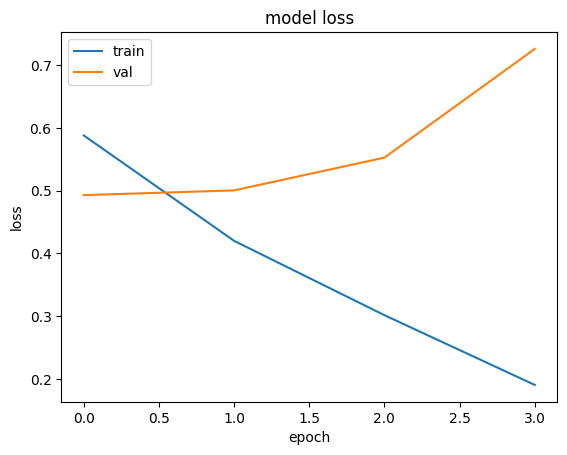

In [28]:
history = bert_model.fit([train_inp,train_mask],
                         train_label,
                         batch_size = 32,
                         epochs = 4,
                         validation_data = ([val_inp,val_mask],val_label),
                         callbacks = callbacks)



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
## over fitting has occured after 1 epoch????

In [29]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### save the model

In [30]:
# Google Driveをマウント
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
model_save_path = '/content/drive/My Drive/sentiment_analysis'
bert_model.save(model_save_path,'saved_bert_model',save_format='tf')